In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
db = pd.read_csv('/home/cristina/Desktop/indicium/machine-failure/data/desafio_manutencao_preditiva_treino.csv')

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


### Descrição dos dados
O conjunto de dados tem 9 colunas, sendo 3 de variável categórica, 6 de variável discreta, sendo 3 com valores inteiros e 3 com valores de ponto flutuante (decimais).
Possui 6667 linhas, não nulas e sem dados faltantes.

In [4]:
db.describe()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


### Análise Descritiva

A tabela mostra que o desvio padrão é pequeno, ou seja, o conjunto de dados está bem uniforme, com exceção da velocidade rotacional e o desgaste da ferramenta.

In [5]:
db.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [26]:
failure_ = db.groupby('failure_type')['type'].value_counts()
failure_

failure_type              type
Heat Dissipation Failure  L         46
                          M         22
                          H          7
No Failure                L       3861
                          M       1933
                          H        641
Overstrain Failure        L         50
                          H          1
                          M          1
Power Failure             L         39
                          M         20
                          H          4
Random Failures           L          7
                          H          4
                          M          1
Tool Wear Failure         L         19
                          M         10
                          H          1
Name: type, dtype: int64

In [41]:
def plot(column, color, title, label):
    sns.set_style('whitegrid')
    plt.figure()
    axis=sns.barplot(
                y=db['failure_type'],
                x=column,
                color=color,
                errorbar=None    
                    )
    axis.bar_label(
        axis.containers[0],
        fmt = '%.1f',
        label_type = 'center',
        color = 'white',
    )

    axis.set(frame_on=False)
    axis.axvline(0, color='k', clip_on=False)
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel('falha')
    plt.show()

In [22]:
db.groupby('failure_type')['torque_nm'].mean()

failure_type
Heat Dissipation Failure    52.493333
No Failure                  39.693986
Overstrain Failure          56.336538
Power Failure               51.080952
Random Failures             43.608333
Tool Wear Failure           34.380000
Name: torque_nm, dtype: float64

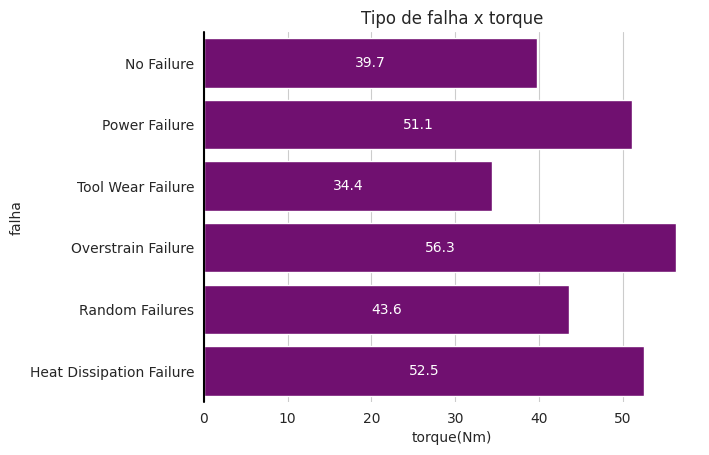

In [42]:
plot(db.torque_nm, 'purple', 'Tipo de falha x torque', 'torque(Nm)')

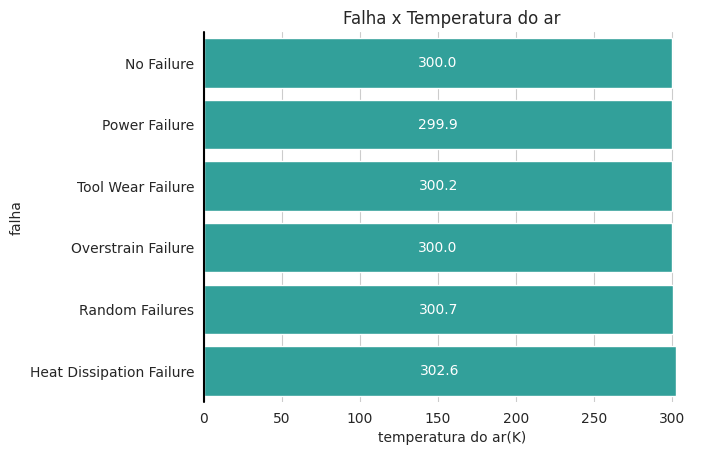

In [9]:
plot(db['air_temperature_k'], 'lightseagreen', 'Falha x Temperatura do ar', 'temperatura do ar(K)')

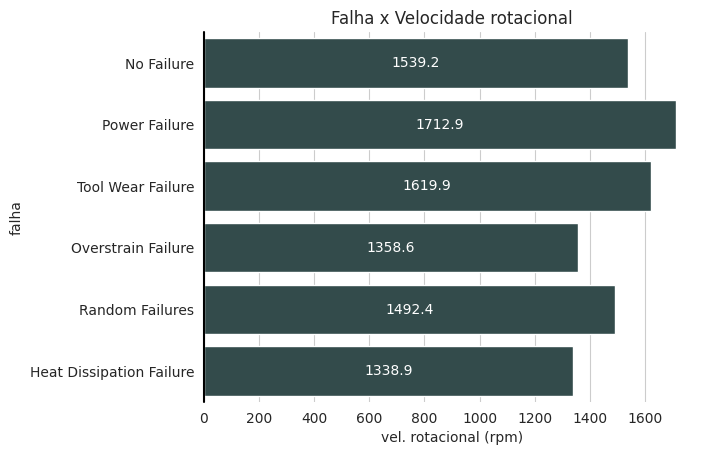

In [44]:
plot(db.rotational_speed_rpm, 'darkslategrey', 'Falha x Velocidade rotacional', 'vel. rotacional (rpm)' )

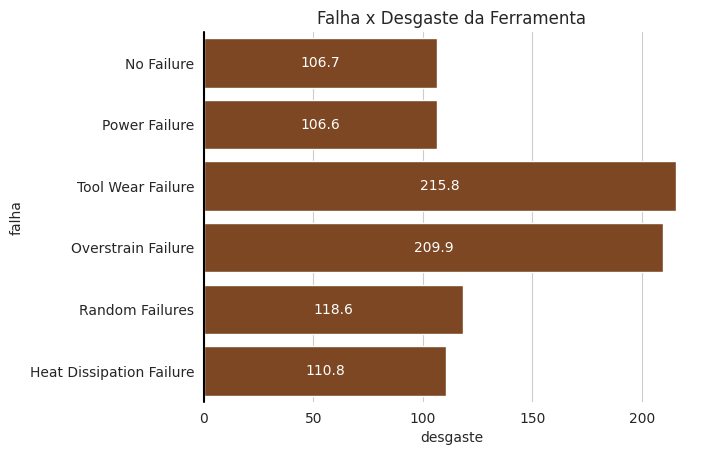

In [11]:
plot(db.tool_wear_min, 'saddlebrown', 'Falha x Desgaste da Ferramenta', 'desgaste' )

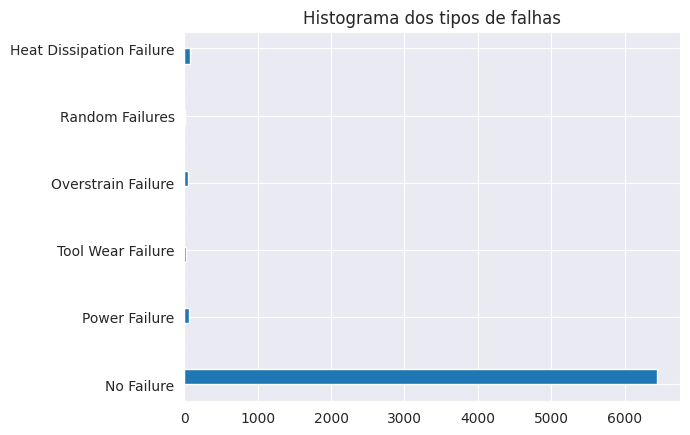

In [12]:
sns.set_style('darkgrid')
plt.figure()
plt.title('Histograma dos tipos de falhas')
plt.hist(db.failure_type, orientation='horizontal', bins=22)
plt.show()